# Swipe to scroll

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

plt.style.use("seaborn-v0_8")


a = 1
b = 0.5
c = 0

A = np.array([[0, 1],
              [-c / a, -b / a]])
B = np.array([[0],
              [1 / a]])

C = np.array([[1, 1]])
D = np.array([[0]])



In [11]:
SS = signal.StateSpace(A, B, C, D)

In [12]:
t = np.linspace(0, 100, 1000)
u = np.zeros_like(t)
u[10:20] = 3
u[50:60] = -2
u[80:90] = 5

t, y, x = signal.lsim(SS, u, t)

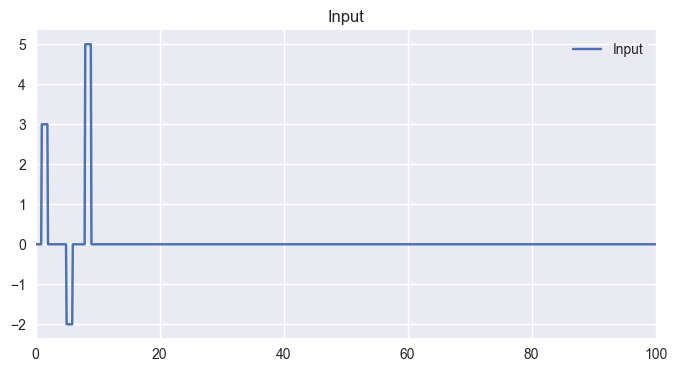

In [13]:
# plot input (u)
plt.figure(figsize=(8, 4))
plt.plot(t, u, label='Input')
plt.title('Input')
plt.xlim(0, 100)
plt.legend()
plt.show()

In [14]:
x[:, 0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.94794945e-03, 3.41489146e-02,
       9.12445720e-02, 1.74873153e-01, 2.83739370e-01, 4.16611165e-01,
       5.72316631e-01, 7.49741070e-01, 9.47824199e-01, 1.16555750e+00,
       1.39703374e+00, 1.62203539e+00, 1.83605287e+00, 2.03962241e+00,
       2.23325405e+00, 2.41743295e+00, 2.59262057e+00, 2.75925584e+00,
       2.91775629e+00, 3.06851903e+00, 3.21192181e+00, 3.34832392e+00,
       3.47806713e+00, 3.60147652e+00, 3.71886128e+00, 3.83051553e+00,
       3.93671902e+00, 4.03773785e+00, 4.13382513e+00, 4.22522160e+00,
       4.31215626e+00, 4.39484693e+00, 4.47350079e+00, 4.54831491e+00,
       4.61947674e+00, 4.68716458e+00, 4.75154802e+00, 4.81278838e+00,
       4.87103910e+00, 4.92644612e+00, 4.97584964e+00, 5.00651166e+00,
       5.01612999e+00, 5.00573196e+00, 4.97629472e+00, 4.92874773e+00,
      

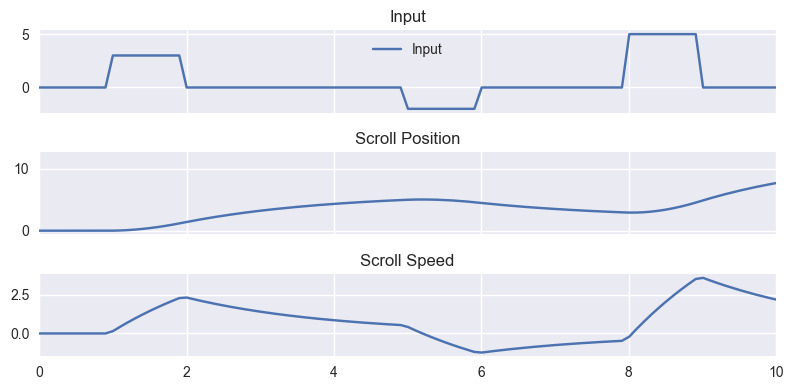

In [15]:
# Plot input (u) and state (x)
fig, ax = plt.subplots(3, 1, figsize=(8, 4), sharex=True)
ax[0].plot(t, u, label='Input')
ax[0].set_title('Input')
ax[0].set_xlim(0, 10)
ax[0].legend()

ax[1].plot(t, x[:, 0])
ax[1].set_title('Scroll Position')
ax[1].set_xlim(0, 10)

ax[2].plot(t, x[:, 1])
ax[2].set_title('Scroll Speed')
ax[2].set_xlim(0, 10)

plt.tight_layout()
plt.show()

# Room Temperature

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

plt.style.use("seaborn-v0_8")

k_rw = 0.1
k_wo = 0.02
k_in = 0.5
T_out = 33 # celcius

A = np.array([[-k_rw, k_rw],
              [k_rw, -(k_rw + k_wo)]])
B = np.array([[k_in, 0],
              [0, k_wo]])
# dx/dt = Ax + Bu

C = np.array([[1, 0],
              [0, 1]])
D = np.array([[0, 0],
              [0, 0]])

SS1 = signal.StateSpace(A, B, C, D)

In [19]:
t = np.linspace(0, 300, 301)
u = np.array([np.zeros_like(t),
              np.ones_like(t) * T_out]).T
u

array([[ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0., 33.],
       [ 0.,

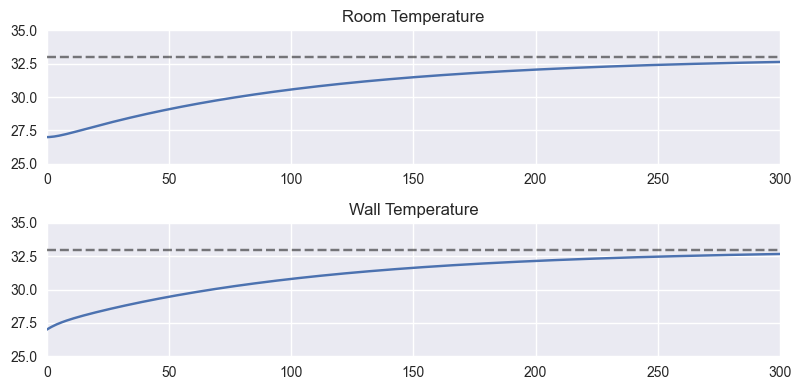

In [20]:

t, y, x = signal.lsim(SS1, u, t, X0=[27, 27])

fig, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].plot(t, x[:, 0])
ax[0].set_title('Room Temperature')
ax[0].set_xlim(0, 300)
ax[0].set_ylim(25, 35)
ax[0].axhline(y=T_out, color='k', linestyle='--', alpha=0.5)

ax[1].plot(t, x[:, 1])
ax[1].set_title('Wall Temperature')
ax[1].set_xlim(0, 300)
ax[1].set_ylim(25, 35)
ax[1].axhline(y=T_out, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Stability

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Create A matrices that are stable, unstable, and oscillatory
A_stable = np.array([[-0.2, 0],
                     [0, -0.3]])
A_unstable = np.array([[0.3, 0],
                       [0, -0.2]])
A_oscillatory = np.array([[0.01, 0.8],
                          [-0.8, 0]])

eigs_stable = np.linalg.eigvals(A_stable)
eigs_unstable = np.linalg.eigvals(A_unstable)
eigs_oscillatory = np.linalg.eigvals(A_oscillatory)

print(f"Stable eigenvalues: {eigs_stable[0]:0.5f} and {eigs_stable[1]:0.5f}")
print(f"Unstable eigenvalues: {eigs_unstable[0]:0.5f} and {eigs_unstable[1]:0.5f}")
print(f"Oscillatory eigenvalues: {eigs_oscillatory[0]} and {eigs_oscillatory[1]}")

Stable eigenvalues: -0.20000 and -0.30000
Unstable eigenvalues: 0.30000 and -0.20000
Oscillatory eigenvalues: (0.0049999999999999845+0.7999843748474091j) and (0.0049999999999999845-0.7999843748474091j)


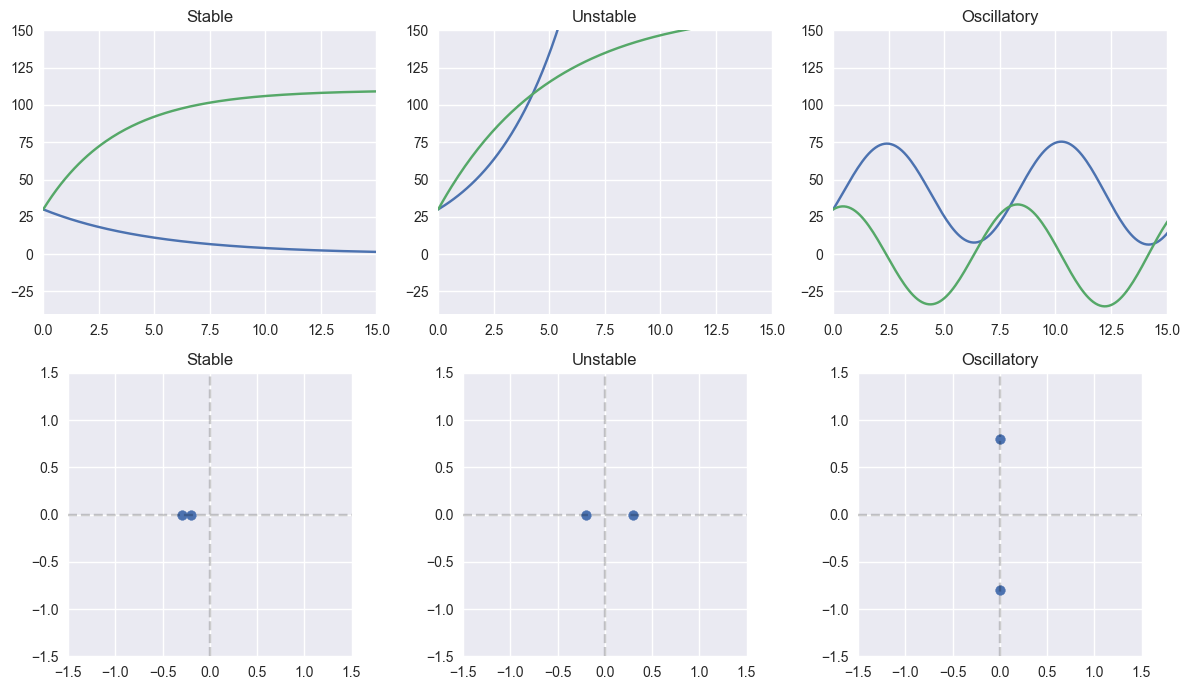

In [105]:
# Visualize the evolution of the state
t = np.linspace(0, 300, 3001)
u = np.array([np.zeros_like(t),
              np.ones_like(t) * T_out]).T

fig, ax = plt.subplots(2, 3, figsize=(12, 7))

B = np.eye(2)
C = np.eye(2)
D = np.zeros((2, 2))

for i, A in enumerate([A_stable, A_unstable, A_oscillatory]):
    SS = signal.StateSpace(A, B, C, D)
    t, y, x = signal.lsim(SS, u, t, X0=[30, 30])
    ax[0, i].plot(t, x[:, 0])
    ax[0, i].plot(t, x[:, 1])
    ax[0, i].set_title(['Stable', 'Unstable', 'Oscillatory'][i])
    ax[0, i].set_xlim(0, 15)
    ax[0, i].set_ylim(-40, 150)

for i, A in enumerate([A_stable, A_unstable, A_oscillatory]):
    eigs = np.linalg.eigvals(A)
    ax[1, i].scatter(eigs.real, eigs.imag)
    ax[1, i].set_xlim(-1.5, 1.5)
    ax[1, i].set_ylim(-1.5, 1.5)
    ax[1, i].axhline(y=0, color='k', linestyle='--', alpha=0.2)
    ax[1, i].axvline(x=0, color='k', linestyle='--', alpha=0.2)
    ax[1, i].set_title(['Stable', 'Unstable', 'Oscillatory'][i])

    # Set the aspect of the plot to be equal
    ax[1, i].set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()


# Controlling Room Temperature with Full State Feedback

In [3]:
eigs = np.linalg.eigvals(A)
print(f"Eigenvalues: {eigs[0]:0.5f} and {eigs[1]:0.5f}")
# Eigenvalues: -0.00950 and -0.21050

Eigenvalues: -0.00950 and -0.21050


In [4]:
# Pole placement
P = np.array([-0.0095, -0.210])
fsf = signal.place_poles(A, B, P)
K = fsf.gain_matrix

print(f"Gain matrix: \n{K}")
# Gain matrix: 
# [[ 0.22   0.2  ]
#  [ 5.    -5.525]]

Gain matrix: 
[[ 0.22   0.2  ]
 [ 5.    -5.525]]


In [5]:
A_hat = A - np.dot(B, K)
eigs_hat = np.linalg.eigvals(A_hat)
print(f"The eigenvalues are: {eigs_hat[0]:0.5f} , {eigs_hat[1]:0.5f}")
# The eigenvalues are: -0.21000 , -0.00950

The eigenvalues are: -0.21000 , -0.00950


In [6]:
SS2 = signal.StateSpace(A_hat, B, C, D)

T_ref = 27
t = np.linspace(0, 300, 301)

u = np.array([
    np.ones_like(t) * T_ref,
    np.ones_like(t) * T_out
]).T

t, y, x = signal.lsim(SS2, u, t, X0=[30, 30])

kf = T_ref / x[-1, 0]
print(f"Feedforward gain: {kf:0.2f}")
SS3 = signal.StateSpace(A_hat, kf * B, C, D)
t, y, x = signal.lsim(SS3, u, t, X0=[30, 30])

Feedforward gain: 0.42


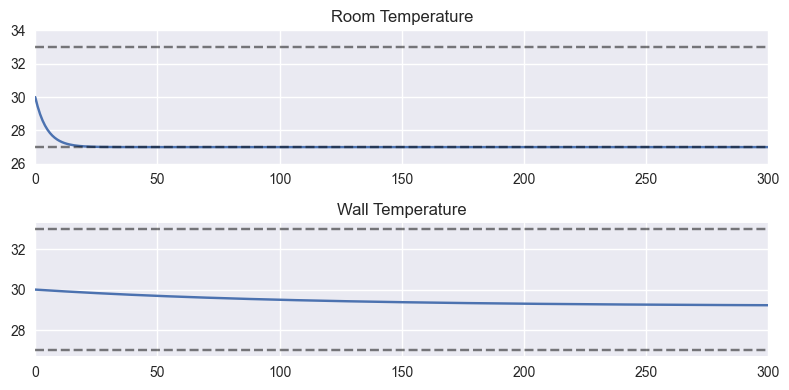

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))
ax[0].plot(t, x[:, 0])
ax[0].set_title('Room Temperature')
ax[0].set_xlim(0, 300)
ax[0].set_ylim(26, 34)
ax[0].axhline(y=T_out, color='k', linestyle='--', alpha=0.5)
ax[0].axhline(y=T_ref, color='k', linestyle='--', alpha=0.5)

ax[1].plot(t, x[:, 1])
ax[1].set_title('Wall Temperature')
ax[1].set_xlim(0, 300)
#ax[1].set_ylim(26, 34)
ax[1].axhline(y=T_out, color='k', linestyle='--', alpha=0.5)
ax[1].axhline(y=T_ref, color='k', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()